<a href="https://colab.research.google.com/github/hemanthkumar17/Graph_Machine_Learning/blob/main/MUTAG_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 5.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import torch; print(torch.__version__)


1.13.1+cu116


In [ ]:
import torch; print(torch.version.cuda)

11.6


In [ ]:
!pip install pyg-lib torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.13.1+cu116.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 KB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 23.3 MB/s eta 0:00:00
  Created wheel for torch-geometric: filename=torch_geometric-2.2.0-py3-none-any.whl size=773302 sha256=89da5824c553f2faa80e131d181947a59aa73798120f4211cf69e8bdf7318c27
  Stored in directory: /root/.cache/pip/wheels/59/a3/20/198928106d3169865ae73afcbd3d3d1796cf6b429b55c65378
Successfully built t

In [ ]:
from datasets import load_dataset

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

dataset_hf = load_dataset("graphs-datasets/MUTAG")
# For the train set (replace by valid or test as needed)
dataset_pg_list = [Data(graph) for graph in dataset_hf["train"]]
dataset_pg = DataLoader(dataset_pg_list)

In [ ]:
dataset_pg_list[0].items()

In [ ]:
import networkx as nx

In [ ]:
[x[1] for x in list(zip(list(range(dataset_pg_list[0]['x']['num_nodes'])), dataset_pg_list[0]['x']['node_feat']))]

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]]

In [ ]:
graph = nx.Graph()
graph.add_nodes_from([(x[0], {"key": x[1].index(1)}) for x in list(zip(list(range(dataset_pg_list[0]['x']['num_nodes'])), dataset_pg_list[0]['x']['node_feat']))])
for i in range(len(dataset_pg_list[0]["x"]["edge_index"][0])):
    graph.add_edge(dataset_pg_list[0]["x"]["edge_index"][0][i], dataset_pg_list[0]["x"]["edge_index"][1][i], key = [x.index(1) for x in dataset_pg_list[0]['x']['edge_attr']][i])

In [ ]:
graph.nodes()[16]

{'key': 2}

In [ ]:
graph.edges(data=True)

EdgeDataView([(0, 1, {'key': 0}), (0, 5, {'key': 0}), (1, 2, {'key': 0}), (2, 3, {'key': 0}), (3, 4, {'key': 0}), (3, 9, {'key': 0}), (4, 5, {'key': 0}), (4, 6, {'key': 0}), (6, 7, {'key': 0}), (7, 8, {'key': 0}), (8, 9, {'key': 0}), (8, 13, {'key': 0}), (9, 10, {'key': 0}), (10, 11, {'key': 0}), (11, 12, {'key': 0}), (12, 13, {'key': 0}), (12, 14, {'key': 1}), (14, 15, {'key': 2}), (14, 16, {'key': 1})])

In [ ]:
list(nx.enumerate_all_cliques(graph)) 

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [0, 1],
 [0, 5],
 [1, 2],
 [2, 3],
 [3, 4],
 [3, 9],
 [4, 5],
 [4, 6],
 [6, 7],
 [7, 8],
 [8, 9],
 [8, 13],
 [9, 10],
 [10, 11],
 [11, 12],
 [12, 13],
 [12, 14],
 [14, 15],
 [14, 16]]

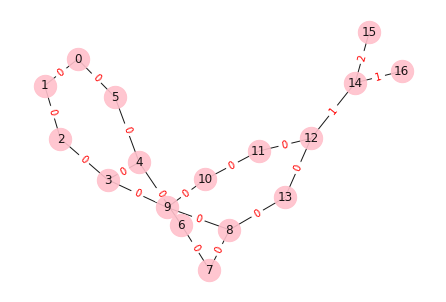

In [ ]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(graph)
plt.figure()
nx.draw(
    graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    labels={node: node for node in graph.nodes()}
)
nx.draw_networkx_edge_labels(
    graph, pos,
    edge_labels=nx.get_edge_attributes(graph, 'key'),
    font_color='red'
)
plt.axis('off')
plt.show()